## Analytique:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, tan, sin, arctan, pi

#paramètre géo.
h = 0.1 
alpha = 15*pi/180

#mouvement d'entrée:
#psi point = omega = une cste
psi = np.linspace(0, 2*pi, 3600) # l'incrément corrsepond à un degré

#on veut plot la fonction analytique:
solution_analytique_1 = -h*cos(psi)*tan(alpha)
solution_analytique_2 = -tan(psi)*cos(alpha)
"""
#y'a des probleme avec la discontinuite donc calcul maitrisé:
sauter = []
for i in range(1, psi.shape[0]):
    if abs((-tan(psi[i])*cos(alpha)) -(-tan(psi[i-1])*cos(alpha))) > 2:
        sauter.append(i)
psi2 = np.array([0])
solution_analytique_2 = np.array([0])
for valeur in range(psi.shape[0]):
    if valeur not in sauter:
        psi2 = np.append(psi2, np.array([psi[valeur]]))
        solution_analytique_2 = np.append(solution_analytique_2, np.array([(-tan(psi[valeur])*cos(alpha))]))
fig, ax = plt.subplots(figsize=(8,6))
"""

"\n#y'a des probleme avec la discontinuite donc calcul maitrisé:\nsauter = []\nfor i in range(1, psi.shape[0]):\n    if abs((-tan(psi[i])*cos(alpha)) -(-tan(psi[i-1])*cos(alpha))) > 2:\n        sauter.append(i)\npsi2 = np.array([0])\nsolution_analytique_2 = np.array([0])\nfor valeur in range(psi.shape[0]):\n    if valeur not in sauter:\n        psi2 = np.append(psi2, np.array([psi[valeur]]))\n        solution_analytique_2 = np.append(solution_analytique_2, np.array([(-tan(psi[valeur])*cos(alpha))]))\nfig, ax = plt.subplots(figsize=(8,6))\n"

## Plot Analytique

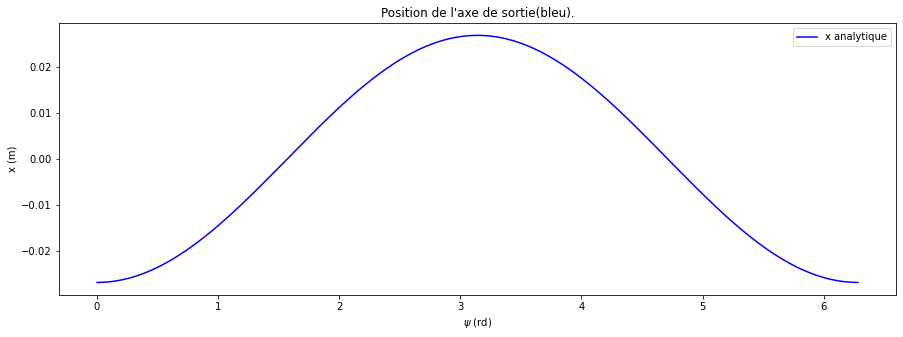

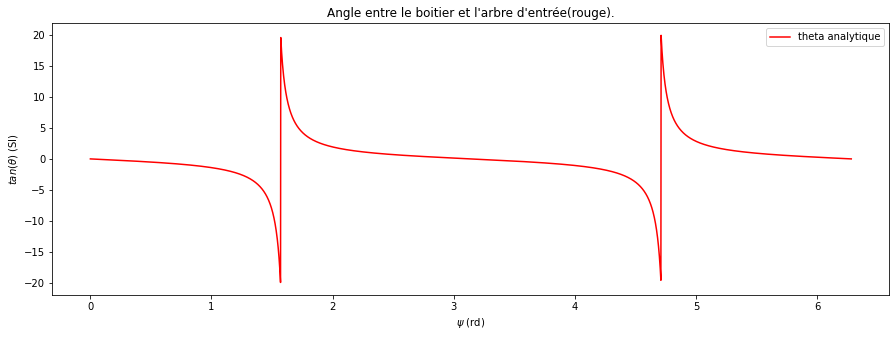

In [2]:
#solution1
fig = plt.figure(figsize=(15,5))
plt.plot(psi, solution_analytique_1, label='x analytique', color = 'blue')

plt.xlabel(r'$ \psi $ (rd)')
plt.ylabel('x (m)')
plt.title("Position de l'axe de sortie(bleu).")

plt.legend()
plt.show()


#solution2
#ya des probleme parce que pas fou la discontinuité on corrige la solution_analytique2 aussi:
solution_analytique_2_v2 = np.array([solution_analytique_2[0]])
for i in range(1, solution_analytique_2.shape[0]):
    if abs(solution_analytique_2[i]) < 20:
        solution_analytique_2_v2 = np.append(solution_analytique_2_v2, solution_analytique_2[i])
#on doit adapter la taille de psi en csq:
psi_sv2 = np.linspace(0, 2*pi, solution_analytique_2_v2.shape[0])

fig = plt.figure(figsize=(15,5))
plt.plot(psi_sv2, solution_analytique_2_v2,'-', label='theta analytique', color = 'red')
plt.xlabel(r'$ \psi $ (rd)')
plt.ylabel(r'$tan(\theta)$ (SI)')
plt.title("Angle entre le boitier et l'arbre d'entrée(rouge).")
plt.legend()
plt.show()

## Numérique:

In [3]:
#de manière numérique:
#equation 1: x*cos(alpha) + h*cos(psi)*sin(alpha) = 0
#equation 2: x*sin(theta)*sin(alpha) − h*(cos(psi)*sin(theta)*cos(alpha) + sin(psi)*cos(theta)) = 0
psi_plot = np.linspace(0, 2*pi, 180) #ici on passe l'incrément à 10degré # plus la mais t'as capté
x_plot = np.zeros(180)
theta_plot = np.zeros(180)
for i in range(180):
    #Newton
    ecart = 1
    #les inconnues sont x, theta
    x = 0
    theta = 0
    z = np.array([x, theta])
    #le paramètre variable est psi:
    psi = psi_plot[i]
    t = 0
    while ecart > 1e-8 and t<20000:
        f1 = x*cos(alpha) + h*cos(psi)*sin(alpha)
        f2 = x*tan(theta)*sin(alpha) - h*(cos(psi)*tan(theta)*cos(alpha) + sin(psi))
        f = np.array([f1, f2])
        #on pose que tan(theta est l'inconnu don on dérive en csq:)
        J1 = [cos(alpha), 0]
        J2 = [tan(theta)*sin(alpha), x*sin(alpha) - h*(cos(psi)*cos(alpha))]
        J = np.array([J1, J2])

        dz = -np.linalg.inv(J)@f
        z = z + dz
        #on actualise l'écart et les valeurs:
        ecart = np.linalg.norm(dz)
        x, theta = z[0], arctan(z[1])
        t += 1
    #a la fin de la boucle on a trouver x et theta assez proche alors:
    theta_plot[i] = z[1]
    x_plot[i] = z[0]

## Plot numérique:

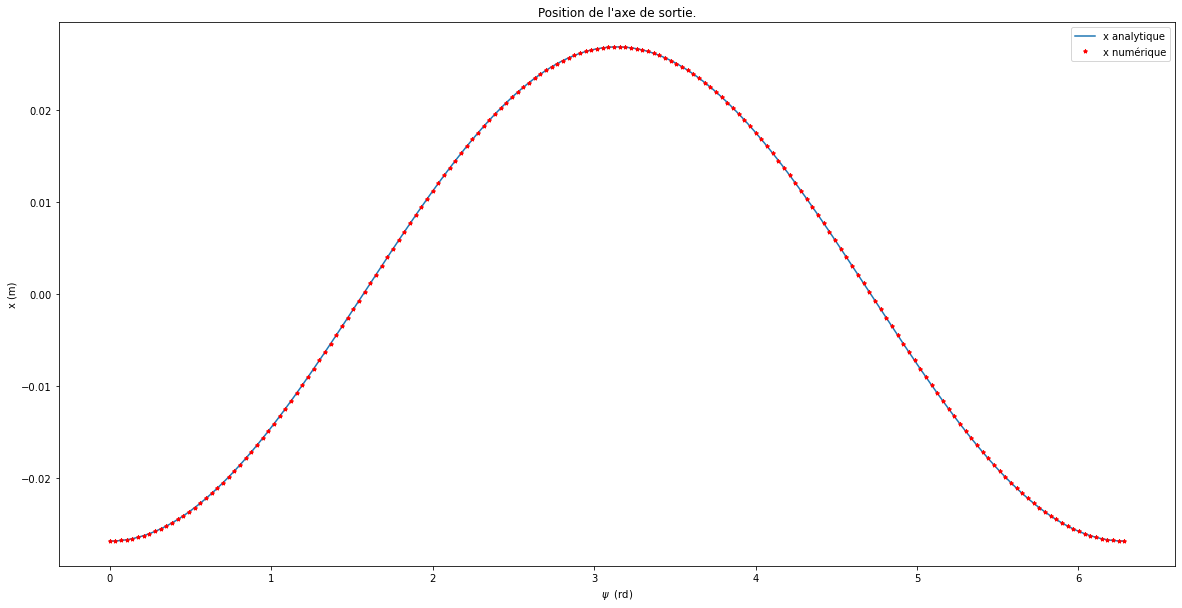

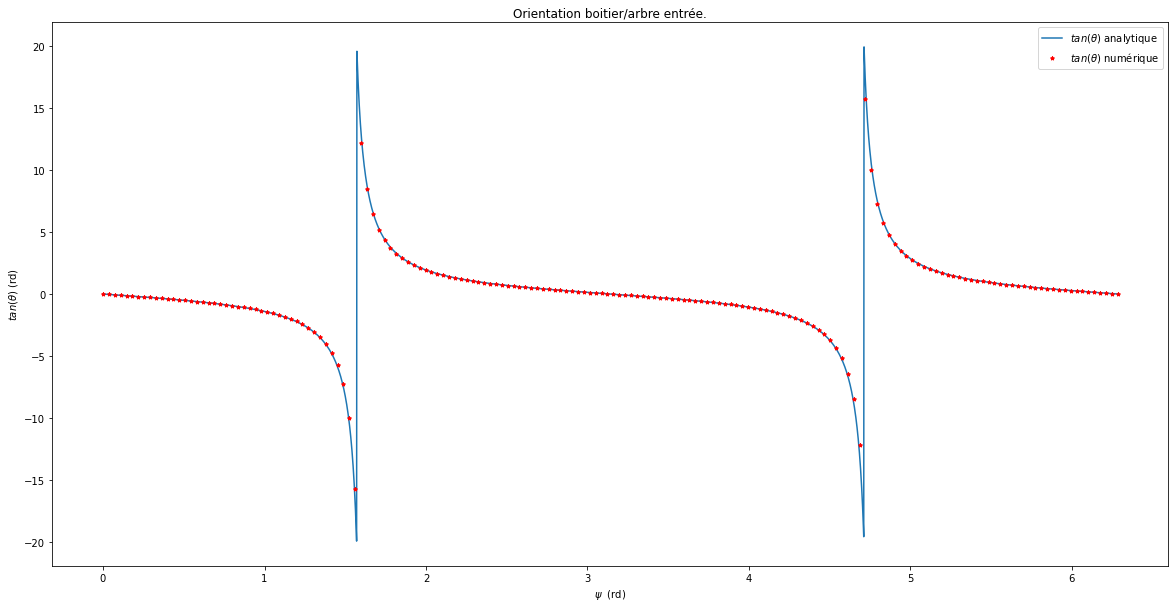

In [5]:
#on peut ploter x et theta:
psi = np.linspace(0, 2*pi, 3600)


#x
fig_phi, ax = plt.subplots(figsize=(20, 10))
ax.plot(psi, solution_analytique_1, label = 'x analytique')
ax.plot(psi_plot, x_plot, 'r*', label = 'x numérique', ms=4)

ax.set_xlabel(r'$ \psi $  (rd)')
ax.set_ylabel(r'x (m)')
ax.set_title("Position de l'axe de sortie.")
ax.legend()


#theta mais attention il y a des discontinuités:
theta_plot_v2 = np.array([theta_plot[0]])
for i in range(1, theta_plot.shape[0]):
    if abs(theta_plot[i]) < 20:
        theta_plot_v2 = np.append(theta_plot_v2, theta_plot[i])
fig_phi, ax = plt.subplots(figsize=(20, 10))
psi_plot_v2 = np.linspace(0, 2*pi, theta_plot_v2.shape[0])

ax.plot(psi_sv2, solution_analytique_2_v2, label = r'$tan(\theta)$ analytique')
ax.plot(psi_plot_v2, theta_plot_v2, 'r*', label = r'$tan(\theta)$ numérique', ms=4)
ax.set_xlabel(r'$ \psi $  (rd)')
ax.set_ylabel(r'$tan(\theta)$ (rd)')
ax.set_title("Orientation boitier/arbre entrée.")
ax.legend()


## Calcul des vitesse $\dot x(t)$ et $\dot \theta (t)$

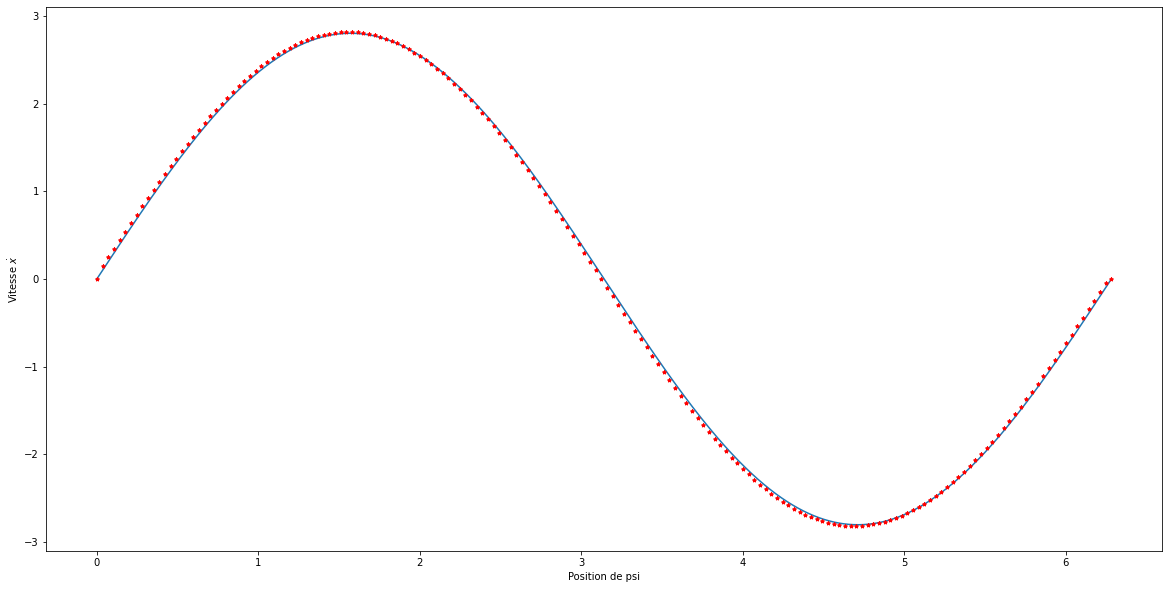

In [6]:
psi_a = np.linspace(0, 2*pi, 3600)
psi_n = np.linspace(0, 2*pi, 180)
dpsi = 2*pi/180

N=1000; omega=N*2*pi/60
dot_x_a = omega*h*sin(psi)*tan(alpha)

dot_x_n = np.zeros(180) + dot_x_a[0]

dt = dpsi/omega
for i in range(1, 179):
    dot_x_n[i] = (x_plot[i+1] - x_plot[i])/dt

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Position de psi")
ax.set_ylabel(r"Vitesse $\dot x$")
ax.plot(psi_a, dot_x_a)
ax.plot(psi_n, dot_x_n, "r*", ms=4)

174


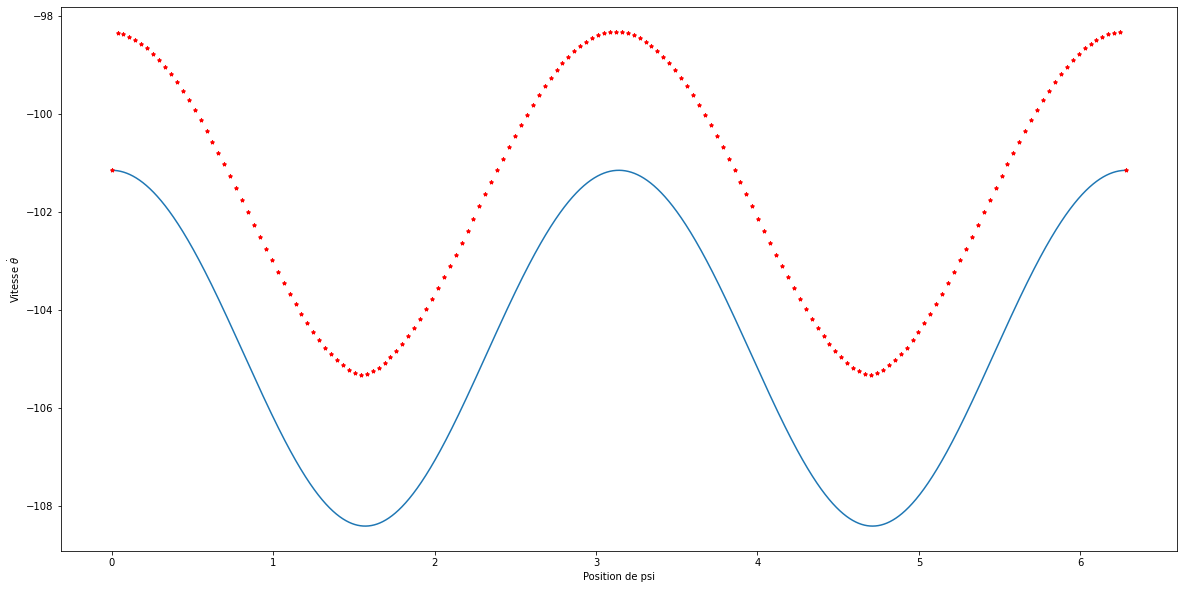

In [26]:
psi_a = np.linspace(0, 2*pi, 3600)
psi_n = np.linspace(0, 2*pi, theta_plot_v2.shape[0])
dpsi = 2*pi/theta_plot_v2.shape[0]

N=1000; omega=N*2*pi/60
dot_th_a = (-omega*(cos(alpha)/cos(psi_a)**2))/(1+(tan(psi_a)**2)*(cos(alpha)**2))

print(theta_plot_v2.shape[0])
dot_th_n = np.zeros(theta_plot_v2.shape[0])
dot_th_n[0] = dot_th_a[0]
dot_th_n[-1] = dot_th_a[-1]

dt = dpsi/omega
for i in range(1, theta_plot_v2.shape[0]-1):
    dot_th_n[i] = (arctan(theta_plot_v2[i+1])-arctan(theta_plot_v2[i]))/dt

dot_th_n_v2 = np.array([dot_th_n[0]])
#probleme de discontinuité:
for i in range(1, dot_th_n.shape[0]):
    if abs(dot_th_n[i]) < 2000:
        dot_th_n_v2 = np.append(dot_th_n_v2, dot_th_n[i])
#on adapte la taille de psi:
psi_n = np.linspace(0, 2*pi, dot_th_n_v2.shape[0])





fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Position de psi")
ax.set_ylabel(r"Vitesse $\dot \theta$")
ax.plot(psi_a, dot_th_a)
ax.plot(psi_n, dot_th_n_v2, "r*", ms=4)